### Test de l'optimisation avec une fonction simple
Minimiser f(x, y) = (x - 3)^2 + (y + 1)^2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os
sys.path.append(os.path.abspath("../../"))
from pipeoptz import Pipeline, Node, FloatParameter, PipelineOptimizer

In [2]:
def simple_function(x, y):
    return (x - 3)**2 + (y + 1)**2

In [3]:
pipe = Pipeline("SimplePipeline")
pipe.add_node(Node("Eval", simple_function, fixed_params={"x":None, "y":None}))

In [4]:
def loss_func(result, expected):
    """We want to find the minimum of the simple function, so we return its value."""
    return result

In [5]:
optimizer = PipelineOptimizer(pipe, loss_function=loss_func, list_run_params=[{}], expected_value=[0])
optimizer.add_param(FloatParameter("Eval", "x", -10., 10.))
optimizer.add_param(FloatParameter("Eval", "y", -10., 10.))

### Grid Search

Best parameters: {'Eval.x': 3.245723963877891, 'Eval.y': -0.9630720430893209}
Wanted: (3, -1)
Final loss: 0.06174394042546014


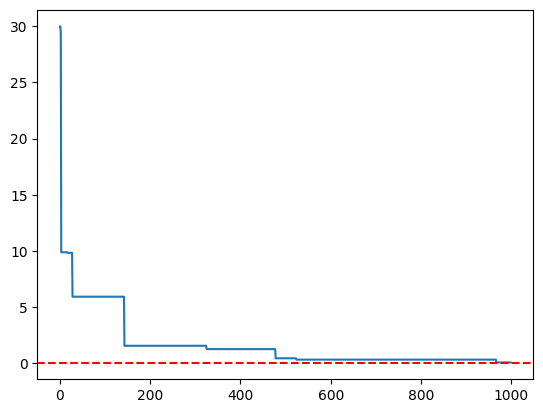

In [6]:
best_params, loss_log = optimizer.optimize("grid_search", max_combinations=1000)
print("Best parameters:", best_params)
print("Wanted:", (3, -1))
print("Final loss:", loss_log[-1])
# plot the loss log in log scale
plt.plot(loss_log)
plt.axhline(0, color='red', linestyle='--')

### ACO

Best parameters: {'Eval.x': np.float64(3.6514330571731772), 'Eval.y': np.float64(-0.6176120434007775)}
Wanted: (3, -1)
Final loss: 0.5705855773301208


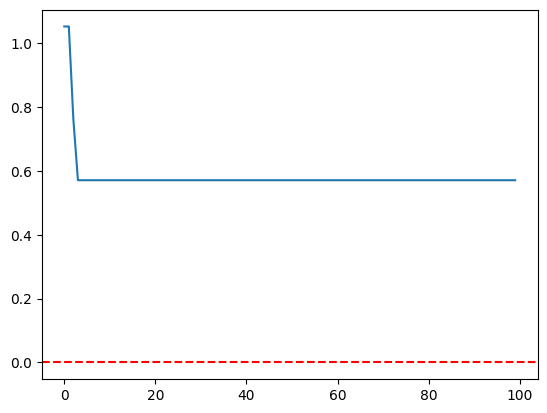

In [7]:
best_params, loss_log = optimizer.optimize("ACO", iterations=100, ants=50)
print("Best parameters:", best_params)
print("Wanted:", (3, -1))
print("Final loss:", loss_log[-1])
# plot the loss log in log scale
plt.plot(loss_log)
plt.axhline(0, color='red', linestyle='--')

### SA

Best parameters: {'Eval.x': 2.9615862838916645, 'Eval.y': -1.0039364389398546}
Wanted: (3, -1)
Final loss: 0.001491109136779002


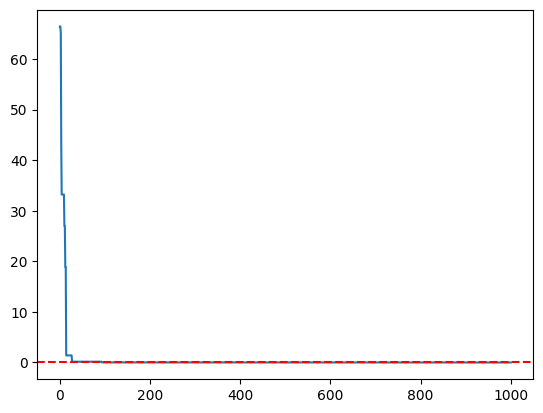

In [8]:
best_params, loss_log = optimizer.optimize("SA", iterations=1000)
print("Best parameters:", best_params)
print("Wanted:", (3, -1))
print("Final loss:", loss_log[-1])
# plot the loss log in log scale
plt.plot(loss_log)
plt.axhline(0, color='red', linestyle='--')

### PSO

Best parameters: {'Eval.x': 2.896728913270877, 'Eval.y': -1.0010101654111736}
Wanted: (3, -1)
Final loss: 0.010665937788371951


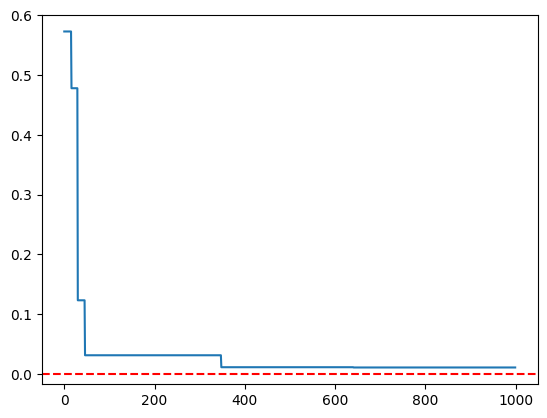

In [9]:
best_params, loss_log = optimizer.optimize("PSO", iterations=1000)
print("Best parameters:", best_params)
print("Wanted:", (3, -1))
print("Final loss:", loss_log[-1])
# plot the loss log in log scale
plt.plot(loss_log)
plt.axhline(0, color='red', linestyle='--')

### GA

Best parameters: {'Eval.x': 3.0055314381815386, 'Eval.y': -0.9715999189996474}
Wanted: (3, -1)
Final loss: 0.000837161409182773


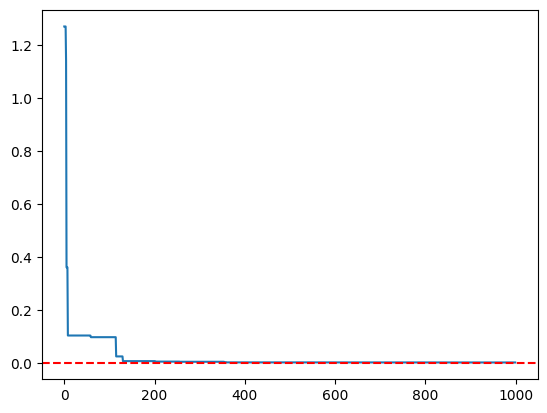

In [10]:
best_params, loss_log = optimizer.optimize("GA", generations=1000)
print("Best parameters:", best_params)
print("Wanted:", (3, -1))
print("Final loss:", loss_log[-1])
# plot the loss log in log scale
plt.plot(loss_log)
plt.axhline(0, color='red', linestyle='--')

### BO

Best parameters: {'Eval.x': 3.077164569467236, 'Eval.y': -1.2066586133304558}
Wanted: (3, -1)
Final loss: 0.04866215324473069


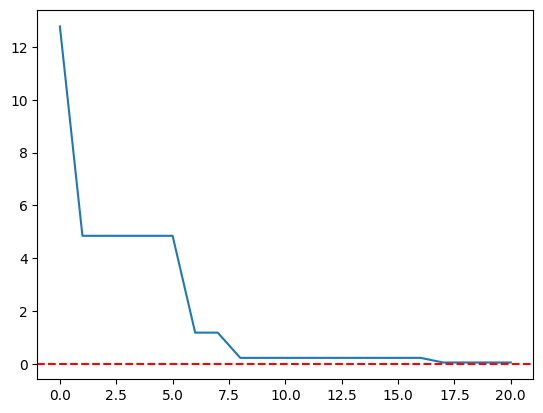

In [11]:
best_params, loss_log = optimizer.optimize("BO", iterations=20)
print("Best parameters:", best_params)
print("Wanted:", (3, -1))
print("Final loss:", min(loss_log))
# plot the loss log in log scale
plt.plot(loss_log)
plt.axhline(0, color='red', linestyle='--')